# Project: Healthy Home Prediction & Map Visualization

# 1. Set Environment & Libraries

In [3]:
# Set an environment for geopandas & other geo-related libraries 

#%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

# Geo-related libraries
!pip install geopandas
!pip install osmnx
!pip install contextily
!pip install folium
!pip install plotly_express
!pip install geofeather

# Others
!pip install matplotlib

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

  Cloning git://github.com/geopandas/geopandas.git to /private/var/folders/wm/v8q_p4k13cz5fhz52kr5d_640000gn/T/pip-req-build-xqm5mao7
  Running command git clone --filter=blob:none --quiet git://github.com/geopandas/geopandas.git /private/var/folders/wm/v8q_p4k13cz5fhz52kr5d_640000gn/T/pip-req-build-xqm5mao7
  fatal: unable to connect to github.com:
  github.com[0: 140.82.112.4]: errno=Operation timed out

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet git://github.com/geopandas/geopandas.git /private/var/folders/wm/v8q_p4k13cz5fhz52kr5d_640000gn/T/pip-req-build-xqm5mao7 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates f

In [4]:
# Data manipulation libraries
import os
import pandas as pd
import numpy as np

# Geo-related libraries
from geopandas import gpd
import osmnx as ox
import folium
from folium.plugins import HeatMap
import geopy
from geopy.geocoders import nominatim
from geopy.extra.rate_limiter import RateLimiter
import contextily as ctx
import geofeather
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely import wkt
from shapely.geometry import Point,MultiPoint
from shapely.ops import nearest_points

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Timer
from tqdm import tqdm,tqdm_notebook

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model support functions
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler 
from pprint import pprint
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/Users/fangyusu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# 2. Load Data

In [5]:
file_name = "Home_n_Map.csv"
df_1 = pd.read_csv(file_name)
df_1.head(5)

,NO value,NO2 value,PM2p5 value,geometry,road_type,zone,tract_name,GEOID,state,county,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.3225938 37.80678062),tertiary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80614989),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8
2,23.611111,23.967768,16.210698,POINT (-122.3223008 37.80642014),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322301,37.806420,high,0.7 - 0.8
3,15.714285,18.435184,15.561862,POINT (-122.3222988 37.80587979999999),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322299,37.805880,high,0.7 - 0.8
4,27.108695,25.797037,17.120884,POINT (-122.3222671 37.80668898),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322267,37.806689,high,0.7 - 0.8


In [6]:
# check a null content(??) and data type
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18286 entries, 0 to 18285
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NO value        18286 non-null  float64
 1   NO2 value       18286 non-null  float64
 2   PM2p5 value     18286 non-null  float64
 3   geometry        18286 non-null  object 
 4   road_type       18286 non-null  object 
 5   zone            18238 non-null  object 
 6   tract_name      18286 non-null  object 
 7   GEOID           18286 non-null  int64  
 8   state           18286 non-null  int64  
 9   county          18286 non-null  int64  
 10  pop_den         18286 non-null  float64
 11  wind            18270 non-null  float64
 12  temp            18270 non-null  float64
 13  Longitude       18286 non-null  float64
 14  Latitude        18286 non-null  float64
 15  Respiratory_HI  18286 non-null  object 
 16  Pt_CANCR        18286 non-null  object 
dtypes: float64(8), int64(3), object

In [9]:
# mapping the data points
gp_1_degree = gpd.GeoDataFrame(df_1,geometry=gpd.points_from_xy(df_1.Longitude,df_1.Latitude),crs={'init':'epsg:4326'})
gp_1_degree.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18286 entries, 0 to 18285
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NO value        18286 non-null  float64 
 1   NO2 value       18286 non-null  float64 
 2   PM2p5 value     18286 non-null  float64 
 3   geometry        18286 non-null  geometry
 4   road_type       18286 non-null  object  
 5   zone            18238 non-null  object  
 6   tract_name      18286 non-null  object  
 7   GEOID           18286 non-null  int64   
 8   state           18286 non-null  int64   
 9   county          18286 non-null  int64   
 10  pop_den         18286 non-null  float64 
 11  wind            18270 non-null  float64 
 12  temp            18270 non-null  float64 
 13  Longitude       18286 non-null  float64 
 14  Latitude        18286 non-null  float64 
 15  Respiratory_HI  18286 non-null  object  
 16  Pt_CANCR        18286 non-null  object  
dtypes: f

/Users/fangyusu/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


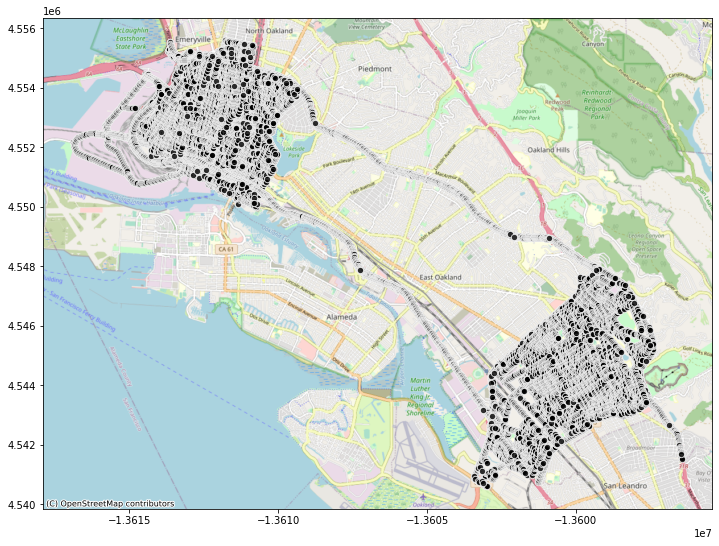

In [12]:
# Mapping the data points
# (b) draw a figure
fig, ax = plt.subplots(figsize =(12,10))
gp_1_degree.to_crs(epsg=3857).plot(ax = ax,
    figsize=(12,12),markersize = 40, color = "black",
    edgecolor = "white",alpha = 0.8,marker = "o");
ctx.add_basemap(ax,source =ctx.providers.OpenStreetMap.Mapnik)

# 3. Data Cleaning

In [18]:
# Check dataframe
df_1.head()

,NO value,NO2 value,PM2p5 value,geometry,road_type,zone,tract_name,GEOID,state,county,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),tertiary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80615),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8
2,23.611111,23.967768,16.210698,POINT (-122.32230 37.80642),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322301,37.806420,high,0.7 - 0.8
3,15.714285,18.435184,15.561862,POINT (-122.32230 37.80588),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322299,37.805880,high,0.7 - 0.8
4,27.108695,25.797037,17.120884,POINT (-122.32227 37.80669),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322267,37.806689,high,0.7 - 0.8


## Rename

In [19]:
# Rename (replacing "NO VALUE" to "NO")
df_1 = df_1.rename(columns={'NO value':'NO'})

# Rename (replacing 'NO2 value' to 'NO')
df_1 = df_1.rename(columns={'NO2 value': 'NO2'})

# Rename (replacing 'NO value' to 'NO')
df_1 = df_1.rename(columns={'PM2p5 value': 'PM2p5'})

## Drop Irrelevant Feature

In [20]:
# count unique values for each feature - do this step bf missing data， preveting unnecessary filters
print("*** Cnts of Each Feature ***")
print(df_1.nunique())

*** Cnts of Each Feature ***
NO                16015
NO2               18226
PM2p5             18281
geometry          18281
road_type             6
zone                  5
tract_name           73
GEOID                73
state                 1
county                1
pop_den              73
wind                 45
temp                 80
Longitude         18129
Latitude          18257
Respiratory_HI        3
Pt_CANCR              3
dtype: int64


In [21]:
df_1.head()

,NO,NO2,PM2p5,geometry,road_type,zone,tract_name,GEOID,state,county,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),tertiary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80615),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8
2,23.611111,23.967768,16.210698,POINT (-122.32230 37.80642),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322301,37.806420,high,0.7 - 0.8
3,15.714285,18.435184,15.561862,POINT (-122.32230 37.80588),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322299,37.805880,high,0.7 - 0.8
4,27.108695,25.797037,17.120884,POINT (-122.32227 37.80669),secondary,industrial,"Census Tract 9819, Alameda County, California",6001981900,6,1,8.336845,4.133333,14.950001,-122.322267,37.806689,high,0.7 - 0.8


In [23]:
# Drop columns (features)
df_1_drop = df_1.drop(['state','county','tract_name','GEOID'],axis= 1)
df_1_drop.head()

,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80615),secondary,industrial,8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8
2,23.611111,23.967768,16.210698,POINT (-122.32230 37.80642),secondary,industrial,8.336845,4.133333,14.950001,-122.322301,37.806420,high,0.7 - 0.8
3,15.714285,18.435184,15.561862,POINT (-122.32230 37.80588),secondary,industrial,8.336845,4.133333,14.950001,-122.322299,37.805880,high,0.7 - 0.8
4,27.108695,25.797037,17.120884,POINT (-122.32227 37.80669),secondary,industrial,8.336845,4.133333,14.950001,-122.322267,37.806689,high,0.7 - 0.8


# Missing Data

In [25]:
# () Size of the data
print('Num of rows: ' + str(df_1_drop.shape[0])) # count row
print('Num of columns: ' + str(df_1_drop.shape[1])) # count column


Num of rows: 18286
Num of columns: 13


In [26]:
#(1) Check missing data
print('*** Missing Value')
print('Sum of N/A values',df_1_drop.isnull().sum())

*** Missing Value
Sum of N/A values NO                 0
NO2                0
PM2p5              0
geometry           0
road_type          0
zone              48
pop_den            0
wind              16
temp              16
Longitude          0
Latitude           0
Respiratory_HI     0
Pt_CANCR           0
dtype: int64


In [28]:
# (2) Choose a method of handling the missing data - drop all N/A?  avg?  front fill?   back fill?
df_1_miss = df_1_drop.dropna(axis= 0, subset=['zone','wind','temp'])
df_1_miss.head()

,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80615),secondary,industrial,8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8
2,23.611111,23.967768,16.210698,POINT (-122.32230 37.80642),secondary,industrial,8.336845,4.133333,14.950001,-122.322301,37.806420,high,0.7 - 0.8
3,15.714285,18.435184,15.561862,POINT (-122.32230 37.80588),secondary,industrial,8.336845,4.133333,14.950001,-122.322299,37.805880,high,0.7 - 0.8
4,27.108695,25.797037,17.120884,POINT (-122.32227 37.80669),secondary,industrial,8.336845,4.133333,14.950001,-122.322267,37.806689,high,0.7 - 0.8


In [30]:
# (3) Reset index
df_1_miss = df_1_miss.reset_index()

# (4) Check info
df_1_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18222 entries, 0 to 18221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   index           18222 non-null  int64   
 1   NO              18222 non-null  float64 
 2   NO2             18222 non-null  float64 
 3   PM2p5           18222 non-null  float64 
 4   geometry        18222 non-null  geometry
 5   road_type       18222 non-null  object  
 6   zone            18222 non-null  object  
 7   pop_den         18222 non-null  float64 
 8   wind            18222 non-null  float64 
 9   temp            18222 non-null  float64 
 10  Longitude       18222 non-null  float64 
 11  Latitude        18222 non-null  float64 
 12  Respiratory_HI  18222 non-null  object  
 13  Pt_CANCR        18222 non-null  object  
dtypes: float64(8), geometry(1), int64(1), object(4)
memory usage: 1.9+ MB


In [31]:
#(5) remove index
df_1_miss = df_1_miss.drop(['index'],axis= 1)

## Duplicated Values

In [35]:
# (0) Size of data
print("Num of rows: " + str(df_1_miss.shape[0]))
print("Num of colums: " + str(df_1_miss.shape[1]))

Num of rows: 18222
Num of colums: 13


In [36]:
# (1) Extract duplicated row
df_1_miss[df_1_miss.duplicated()]

,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
174,32.059862,24.190178,19.514652,POINT (-122.30853 37.81503),secondary,industrial,220.026011,4.125000,15.000001,-122.308528,37.815028,high,0.7 - 0.8
504,16.426667,19.134740,18.727645,POINT (-122.30013 37.80641),secondary,mixed,3520.358174,4.083333,15.083335,-122.300129,37.806411,high,0.7 - 0.8
7161,92.638344,45.426999,28.987625,POINT (-122.23379 37.77509),motorway,mixed,2351.277070,4.091667,15.166668,-122.233788,37.775092,high,0.7 - 0.8


In [37]:
# (2) Print the first & last rows BEFORE removing duplicated values
df_1_miss.iloc[[0,-1]]

,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
18221,18.842105,16.122072,9.270166,POINT (-122.13903 37.73246),motorway,residential,486.040242,3.816667,15.041669,-122.139033,37.732464,low,< 0.4


In [38]:
# # Remove duplicated row 
# # (method one) keep='first' -> the first occurrence gets kept, and all others get identified as duplicates.
# new = df.drop_duplicates(subset=['column1'], keep='first', inplace=False)
# # (method two) keep='last' -> the last occurrence gets kept, and all others get identified as duplicates.
# new = df.drop_duplicates(subset=['column1'], keep='last', inplace=False)
# # (method three) keep='False' -> remove all duplicates
# new = df.drop_duplicates(subset=['column1'], keep='false', inplace=False)


# (3) Remove duplicated values
df_1_dup = df_1_miss.drop_duplicates()
df_1_dup.tail(2)

,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
18220,9.333333,9.039947,11.325624,POINT (-122.15509 37.77014),motorway,residential,1475.818172,3.766667,14.600001,-122.155090,37.770138,low,< 0.4
18221,18.842105,16.122072,9.270166,POINT (-122.13903 37.73246),motorway,residential,486.040242,3.816667,15.041669,-122.139033,37.732464,low,< 0.4


In [39]:
# (4) Reset index, creating a new df 
df_1_dup.reset_index(inplace=True)
# (5) Check duplicated values
df_1_dup[df_1_dup.duplicated()]

,index,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR


In [40]:
# (6) Print the first & last rows AFTER removing duplicated values
df_1_dup.iloc[[0,-1]]

,index,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
18218,18221,18.842105,16.122072,9.270166,POINT (-122.13903 37.73246),motorway,residential,486.040242,3.816667,15.041669,-122.139033,37.732464,low,< 0.4


## Outliers

In [41]:
# Copy
df_1_out = df_1_dup.copy()

df_1_out.head(1)

,index,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,0,23.390071,17.539762,17.6127,POINT (-122.32259 37.80678),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8


<AxesSubplot: ylabel='temp'>

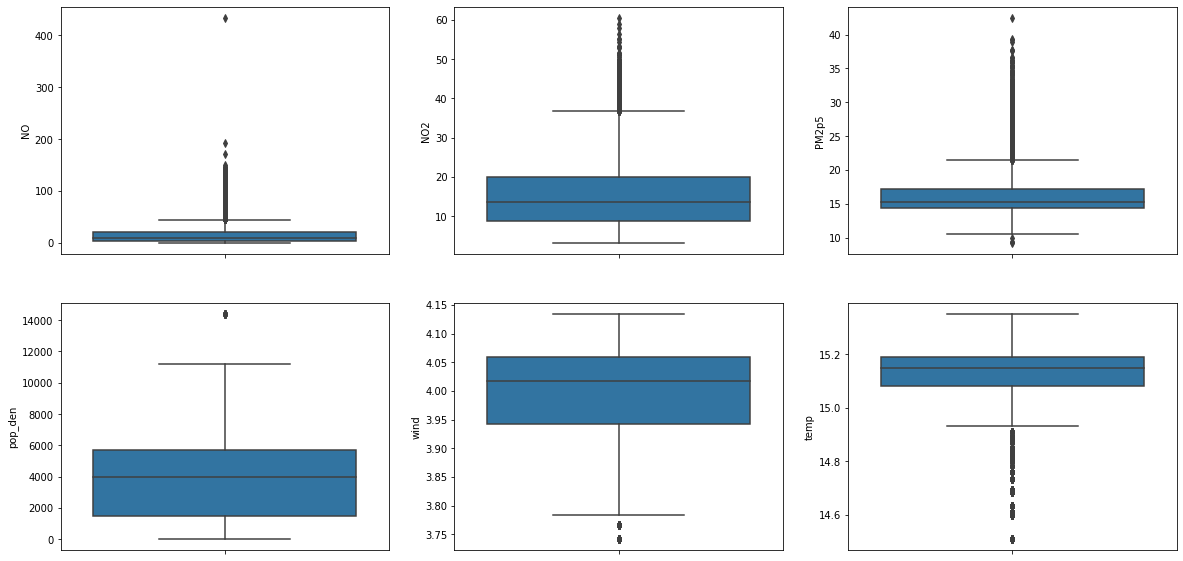

In [42]:
# Checking outliers

_,axss = plt.subplots(2,3, figsize=[20,10])  # create a 2x3 matrix = 6 figures
sns.boxplot(y ='NO', data=df_1_out, ax=axss[0, 0])
sns.boxplot(y ='NO2', data=df_1_out, ax=axss[0, 1])
sns.boxplot(y ='PM2p5', data=df_1_out, ax=axss[0, 2])
sns.boxplot(y ='pop_den', data=df_1_out, ax=axss[1][0])
sns.boxplot(y ='wind', data=df_1_out, ax=axss[1][1])
sns.boxplot(y ='temp', data=df_1_out, ax=axss[1][2])

In [43]:
# Mannually remove outliers based on knowledge
# if NO > 200 -> let all of them equl to 200
df_1_out.loc[df_1_out['NO'] > 200, 'NO'] = 200

# 4. Feature Engineering

## Oakland city

In [45]:
# Import oakland street and map data
Oakland_poly = ox.geocode_to_gdf('Oakland, California')

Oakland_poly

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-122.35588 37.83573, -122.35009 37.8...",37.885426,37.633676,-122.11442,-122.355881,298690193,relation,2833530,37.804456,-122.271356,"Oakland, Alameda County, CAL Fire Northern Reg...",boundary,administrative,0.851796


<AxesSubplot: >

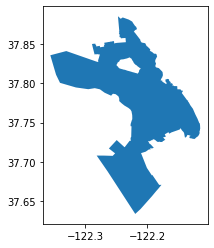

In [46]:
Oakland_poly.plot()

### convert geo

In [49]:
# Check
Oakland_poly.crs, gp_1_degree.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: +init=epsg:4326 +type=crs>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (degree)
 - lat[north]: Latitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [50]:
# Conver geometey object -> geo df
gp_1_degree = gpd.GeoDataFrame(df_1_out, geometry = df_1_out['geometry'], crs={'init' :'epsg:4326'})

Oakland_poly.crs, gp_1_degree.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: +init=epsg:4326 +type=crs>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (degree)
 - lat[north]: Latitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [51]:
gp_1_degree.head(2)

,index,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR
0,0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8
1,1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80615),secondary,industrial,8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8


### Spatial-join

In [52]:
# spatial-join the dataset of pollutant and health with the Oakland polygon grid (make sure all data represent Oakland city)
gpd_1_city = gpd.sjoin(gp_1_degree, Oakland_poly, how="inner", op="intersects")

gpd_1_city.head(2)

/Users/fangyusu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/wm/v8q_p4k13cz5fhz52kr5d_640000gn/T/ipykernel_41162/4254521258.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  gpd_1_city = gpd.sjoin(gp_1_degree, Oakland_poly, how="inner", op="intersects")


,index,NO,NO2,PM2p5,geometry,road_type,zone,pop_den,wind,temp,Longitude,Latitude,Respiratory_HI,Pt_CANCR,index_right,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,0,23.390071,17.539762,17.612700,POINT (-122.32259 37.80678),tertiary,industrial,8.336845,4.133333,14.950001,-122.322594,37.806781,high,0.7 - 0.8,0,37.885426,37.633676,-122.11442,-122.355881,298690193,relation,2833530,37.804456,-122.271356,"Oakland, Alameda County, CAL Fire Northern Reg...",boundary,administrative,0.851796
1,1,19.700000,19.956750,15.946719,POINT (-122.32231 37.80615),secondary,industrial,8.336845,4.133333,14.950001,-122.322310,37.806150,high,0.7 - 0.8,0,37.885426,37.633676,-122.11442,-122.355881,298690193,relation,2833530,37.804456,-122.271356,"Oakland, Alameda County, CAL Fire Northern Reg...",boundary,administrative,0.851796


In [53]:
# count unique values for each feature
print("*** Cnts of Each Feature ***")
print(gpd_1_city.nunique())

*** Cnts of Each Feature ***
index             18219
NO                15963
NO2               18162
PM2p5             18217
geometry          18217
road_type             6
zone                  5
pop_den              70
wind                 45
temp                 80
Longitude         18067
Latitude          18194
Respiratory_HI        3
Pt_CANCR              3
index_right           1
bbox_north            1
bbox_south            1
bbox_east             1
bbox_west             1
place_id              1
osm_type              1
osm_id                1
lat                   1
lon                   1
display_name          1
class                 1
type                  1
importance            1
dtype: int64


In [54]:
gpd_1_city = gpd_1_city.drop(['index_right', 'bbox_east', 'bbox_north', 'bbox_south', 'bbox_west'], axis=1)

## City structure: Roads

### city

In [55]:
# (1) grab street data (roads and intersections) for entire city
oak_streets = ox.graph_from_place('Oakland, California', network_type = 'drive')
nodes, edges = ox.graph_to_gdfs(oak_streets)

In [56]:
Oakland_poly.head(5)

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-122.35588 37.83573, -122.35009 37.8...",37.885426,37.633676,-122.11442,-122.355881,298690193,relation,2833530,37.804456,-122.271356,"Oakland, Alameda County, CAL Fire Northern Reg...",boundary,administrative,0.851796


In [57]:
nodes.head(1)

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
30362888,37.825844,-122.303049,8A,motorway_junction,3,POINT (-122.30305 37.82584)


In [58]:
edges.head(1)

,,,osmid,oneway,lanes,ref,highway,maxspeed,reversed,length,geometry,bridge,name,tunnel,access,junction
u,v,key,,,,,,,,,,,,,,
30362888,1943438853,0,710721717,True,7,I 80,motorway,50 mph,False,135.576,"LINESTRING (-122.30305 37.82584, -122.30455 37...",NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

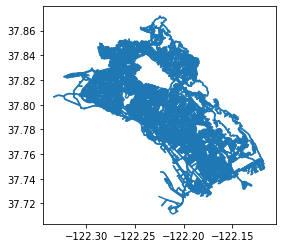

In [59]:
edges.plot()

### road

In [60]:
# (2 - a) Identify roads 
oakland_rds = edges.copy()
print(oakland_rds['highway'].value_counts())
print ("Num of rows: " + str(oakland_rds.shape[0])) # row count
print ("Num of columns: " + str(oakland_rds.shape[1])) # col count

residential                        15071
secondary                           2929
tertiary                            2495
primary                              773
motorway_link                        319
unclassified                         229
motorway                             204
secondary_link                       109
living_street                         78
trunk                                 58
tertiary_link                         43
trunk_link                            38
primary_link                          15
[unclassified, residential]            8
[living_street, residential]           2
[motorway_link, secondary_link]        1
[secondary, residential]               1
[secondary_link, motorway_link]        1
Name: highway, dtype: int64
Num of rows: 22374
Num of columns: 14


In [61]:
# (2 - b) Clean roads 

# remove '_link' in xxx_link & add it to xxx 
# (e.g., motorway_link is added on motorway )
oakland_rds['highway'] = oakland_rds['highway'].str.replace('_link', '')


# 'trunk'  -->  'secondary'
oakland_rds['highway'] = np.where(oakland_rds['highway'] == 'trunk', 'secondary', oakland_rds['highway'])


# 'living_street' --> 'residential'
oakland_rds['highway'] = np.where(oakland_rds['highway'] == 'living_street', 'residential', oakland_rds['highway'])

# Check results
print(oakland_rds['highway'].value_counts())

residential     15149
secondary        3134
tertiary         2538
primary           788
motorway          523
unclassified      229
Name: highway, dtype: int64


/Users/fangyusu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='highway', ylabel='count'>

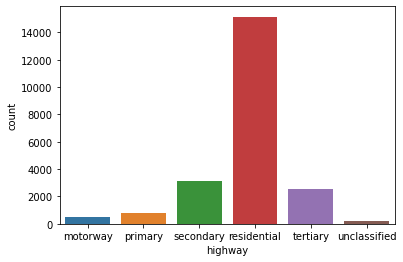

In [62]:
sns.countplot(oakland_rds['highway'])